In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
import os
os.getcwd()

'C:\\Users\\navee\\Desktop\\data science python\\machine learning'

In [3]:
df = pd.read_csv('C://Users//navee//Desktop/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
df.shape

(400, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [15]:
purchased = df.Purchased.value_counts().sort_index()
purchased

Purchased
0    257
1    143
Name: count, dtype: int64

In [19]:
purchased = df[df["Purchased"]==0].Purchased.count()
notPurchased = df[df["Purchased"]==1].Purchased.count()
print(purchased,notPurchased)

257 143


C:\Users\navee\AppData\Local\Temp\ipykernel_29000\3867979132.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

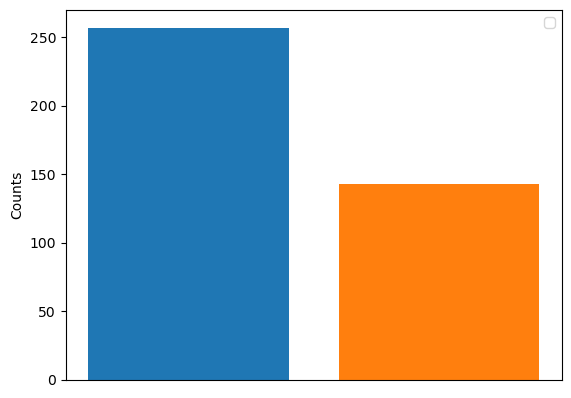

In [29]:
plt.bar(0,purchased)
plt.bar(1,notPurchased)
plt.xticks([])
plt.ylabel("Counts")
plt.legend()
plt.show

In [35]:
x=df.iloc[:,[2,3]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [37]:
x.shape

(400, 2)

In [39]:
y=df["Purchased"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=56)

In [53]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 2) (120, 2) (280,) (120,)


In [55]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=1,solver="liblinear",multi_class="ovr")
lg.fit(x_train,y_train)

C:\Users\navee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [69]:
predlr = lg.predict(x_test)
predlr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predlr)
acclr

0.65

In [93]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
conlr = confusion_matrix(y_test,predlr)
conlr

array([[76,  1],
       [41,  2]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

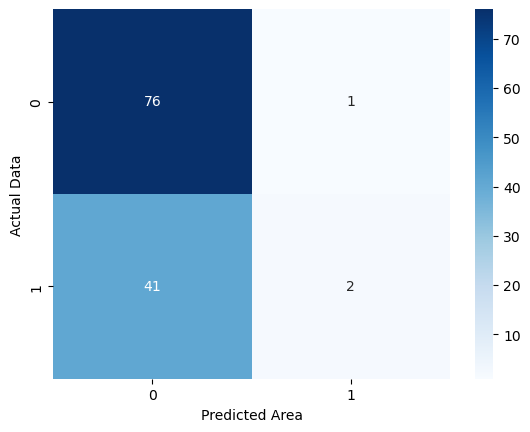

In [95]:
sns.heatmap(conlr,annot=True,cmap="Blues")
plt.xlabel("Predicted Area")
plt.ylabel("Actual Data")
plt.show

In [97]:
precision = precision_score(y_test,predlr)
precision

0.6666666666666666

In [99]:
recall = recall_score(y_test,predlr)
recall

0.046511627906976744

In [101]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy",splitter="best")
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [103]:
preddc = dc.predict(x_test)
preddc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
accdc = accuracy_score(y_test,preddc)
accdc

0.85

In [107]:
condc = confusion_matrix(y_test,preddc)
condc

array([[70,  7],
       [11, 32]], dtype=int64)

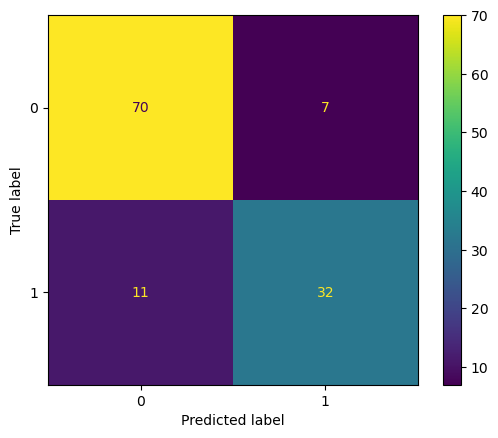

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(condc)
disp.plot()
plt.show()

In [113]:
precision2 = precision_score(y_test,preddc)
recall2 = recall_score(y_test,preddc)
print(precision2,recall2)

0.8205128205128205 0.7441860465116279


In [115]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(criterion="entropy",max_depth=2,n_estimators=15)
randfor.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=15)

In [117]:
randforestpred = randfor.predict(x_test)
randforestpred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [119]:
randforestacc = accuracy_score(y_test,randforestpred)
randforestacc

0.9333333333333333

In [121]:
randforestconf = confusion_matrix(y_test,randforestpred)
randforestconf

array([[72,  5],
       [ 3, 40]], dtype=int64)

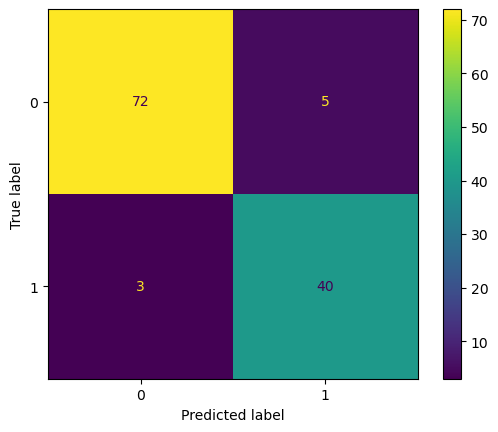

In [125]:
display = ConfusionMatrixDisplay(randforestconf)
display.plot()

In [127]:
randforestprecision = precision_score(y_test,randforestpred)
recallrandom = recall_score(y_test,randforestpred)
print(randforestprecision,recallrandom)

0.8888888888888888 0.9302325581395349


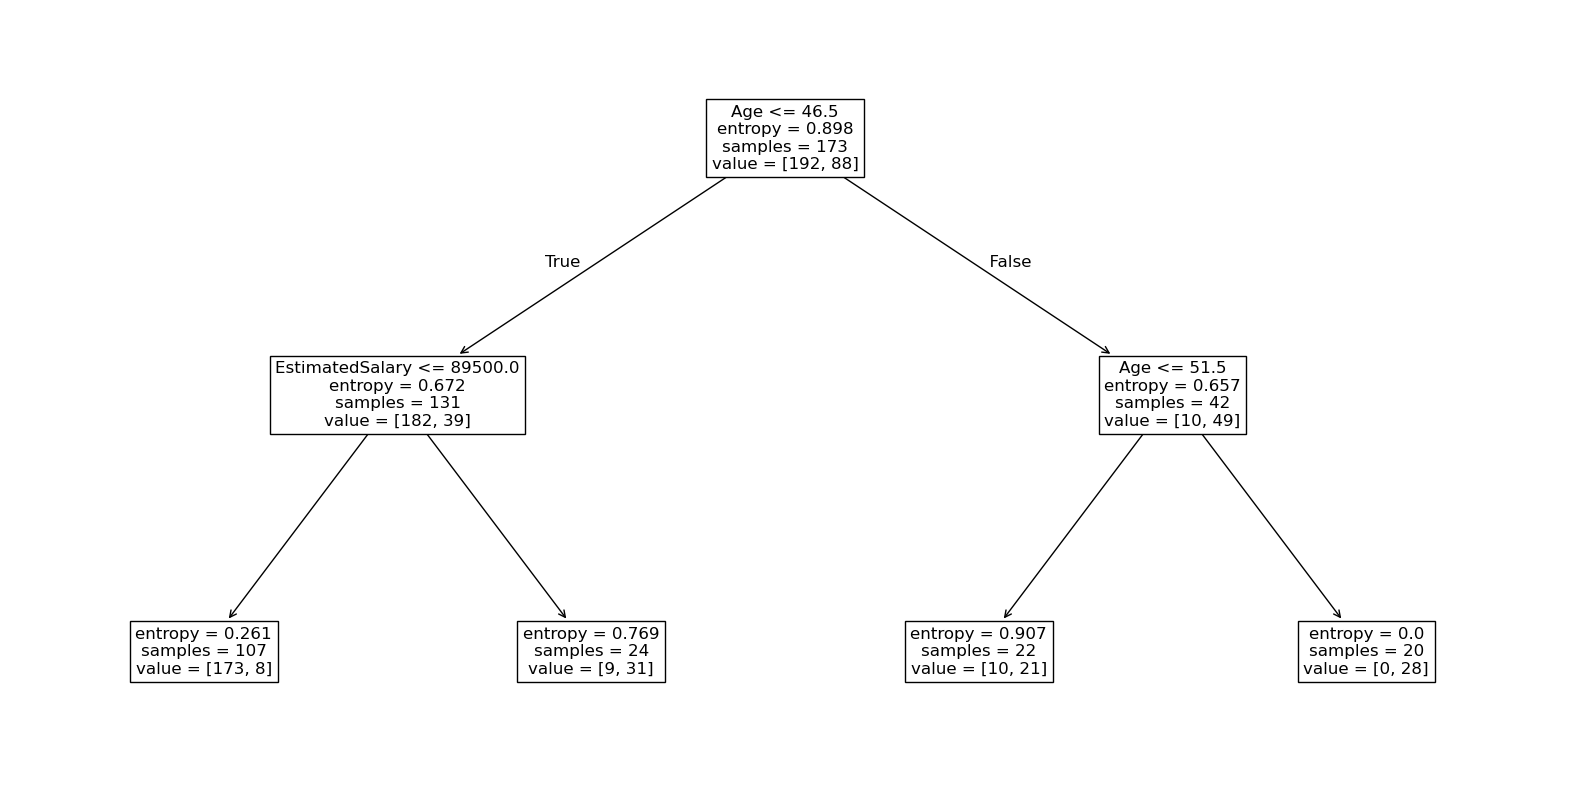

In [137]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(randfor.estimators_[5],feature_names=x_train.columns,fontsize=12)
plt.show()